# Figuring Out How to Plot in 3D

This is the notebook I used to organize my thoughts and figure out how to make a 3D scatterplot of the coalescent.

Sections:
1. Import & Simplify
2. 2D Scatterplot
3. How is data stored?
4. Experimenting with Creating Arrays
5. Making lists of parents and children
6. 3D Scatterplot

## Import & Simplify

In [1]:
import pyslim, tskit, msprime
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG, display

ts = pyslim.load("/Users/ARIADNA/Desktop/Attempt3.trees")

extant = ts.individuals_alive_at(0)

extant_nodes = []
for i in extant:
    extant_nodes.extend(ts.individual(i).nodes)
    
sts = ts.simplify(extant_nodes)

This simplifies the tree sequence to just the extant nodes in Generation 10 (the last generation), and all of their ancestor nodes. 

NOTE: In my SLiM code, I saved every individual from Generation 1 through 10, which later allows me to get the individual for each node in the tree sequence, and that individual's location.

Not mutating this time around.

╔════════════════════════╗
║TreeSequence            ║
╠═══════════════╤════════╣
║Trees          │       1║
╟───────────────┼────────╢
║Sequence Length│ 10000.0║
╟───────────────┼────────╢
║Sample Nodes   │      40║
╟───────────────┼────────╢
║Total Size     │18.3 KiB║
╚═══════════════╧════════╝
╔═══════════╤════╤═══════╤════════════╗
║Table      │Rows│Size   │Has Metadata║
╠═══════════╪════╪═══════╪════════════╣
║Edges      │  60│1.6 KiB│          No║
╟───────────┼────┼───────┼────────────╢
║Individuals│  46│4.3 KiB│         Yes║
╟───────────┼────┼───────┼────────────╢
║Migrations │   0│4 Bytes│          No║
╟───────────┼────┼───────┼────────────╢
║Mutations  │   0│1.2 KiB│          No║
╟───────────┼────┼───────┼────────────╢
║Nodes      │  68│2.9 KiB│         Yes║
╟───────────┼────┼───────┼────────────╢
║Populations│   1│2.8 KiB│         Yes║
╟───────────┼────┼───────┼────────────╢
║Provenances│   2│3.2 KiB│          No║
╟───────────┼────┼───────┼────────────╢
║Sites      │   0│8 Byt

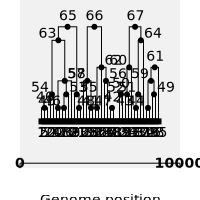

In [2]:
print (sts)

from IPython.display import SVG
SVG(sts.draw_svg())

## 
## 2D Scatterplot

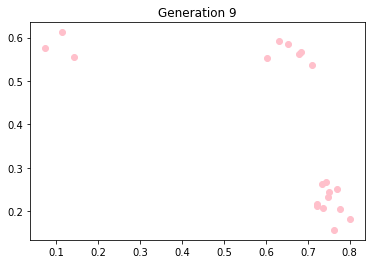

In [49]:
%matplotlib inline
## ^ if you use this 'magic' thingy, your plot will print in your notebook but it won't be interactive (which is more for 3D plots)

gen9 = ts.individuals_alive_at(1)
gen9_locs = ts.individual_locations[gen9, : ]

x = gen9_locs[:,0]
y = gen9_locs [:,1]

plt.scatter(x,y, color = 'pink')

plt.title("Generation 9")
plt.show()

^This code could be used to plot the locations of individuals in each generation (either as different plots, or all in one)

## 
## How is data stored?

The following code chunks are just me figuring out how data is stored, and what it looks like by printing it. Could be useful to look through.

In [4]:
final_nodes = sts.nodes()

for node in sts.nodes():
    t = node.time
    print (int(t))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
3
3
3
3
4
4
4
6
6
7
7
7


In [6]:
for individual in sts.individuals():
    coordinates = individual.location
    print (coordinates)

[0.72382112 0.2454417  0.        ]
[0.1145785  0.58706439 0.        ]
[0.7671865  0.22441584 0.        ]
[0.77441855 0.25202644 0.        ]
[0.73278211 0.18174257 0.        ]
[0.6861373  0.56587198 0.        ]
[0.72986576 0.21486449 0.        ]
[0.60364716 0.5675226  0.        ]
[0.74827516 0.25186965 0.        ]
[0.7670342  0.17669777 0.        ]
[0.71579101 0.21568983 0.        ]
[0.74864991 0.22379185 0.        ]
[0.6461277  0.58941739 0.        ]
[7.03660256e-001 5.58838626e-001 1.26618200e-255]
[7.69135262e-001 2.22862019e-001 1.28822983e-231]
[1.20343296e-001 5.60015243e-001 1.28822981e-231]
[0.75253951 0.27391788 0.        ]
[0.63111073 0.584616   0.        ]
[0.62421705 0.60309208 0.        ]
[0.77743937 0.24330447 0.        ]
[0.09877166 0.55959556 0.        ]
[0.6640421  0.52166155 0.        ]
[0.78496644 0.24646257 0.        ]
[0.77354797 0.27569481 0.        ]
[7.28260754e-001 1.72479948e-001 1.28822983e-231]
[0.10944047 0.53944882 0.        ]
[0.74440976 0.22217613 0.     

In [7]:
for node in final_nodes:
    print (node)

Node(id=0, flags=1, time=0.0, population=0, individual=0, metadata={'slim_id': 360, 'is_null': False, 'genome_type': 0})
Node(id=1, flags=1, time=0.0, population=0, individual=0, metadata={'slim_id': 361, 'is_null': False, 'genome_type': 0})
Node(id=2, flags=1, time=0.0, population=0, individual=1, metadata={'slim_id': 362, 'is_null': False, 'genome_type': 0})
Node(id=3, flags=1, time=0.0, population=0, individual=1, metadata={'slim_id': 363, 'is_null': False, 'genome_type': 0})
Node(id=4, flags=1, time=0.0, population=0, individual=2, metadata={'slim_id': 364, 'is_null': False, 'genome_type': 0})
Node(id=5, flags=1, time=0.0, population=0, individual=2, metadata={'slim_id': 365, 'is_null': False, 'genome_type': 0})
Node(id=6, flags=1, time=0.0, population=0, individual=3, metadata={'slim_id': 366, 'is_null': False, 'genome_type': 0})
Node(id=7, flags=1, time=0.0, population=0, individual=3, metadata={'slim_id': 367, 'is_null': False, 'genome_type': 0})
Node(id=8, flags=1, time=0.0, po

In [10]:
for node in sts.nodes():
    folk = node.individual
    print (folk)

0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
37
38
39
40
41
42
43
44
45
32
32
33
33
34
35
36
28
29
30
31
25
26
27
23
24
20
21
22


##
## Experimenting with Creating Arrays

In [11]:
##Create array of individuals

ind_array = []

for node in sts.nodes():
    ind_array.append(node.individual)
    
print (ind_array)

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 37, 38, 39, 40, 41, 42, 43, 44, 45, 32, 32, 33, 33, 34, 35, 36, 28, 29, 30, 31, 25, 26, 27, 23, 24, 20, 21, 22]


In [13]:
## Create array of node times

time_array = []

for node in sts.nodes():
    time_array.append(int(node.time))

print (time_array)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 6, 6, 7, 7, 7]


In [15]:
## This iterates through every individual in the simplified tree sequence and prints their info.

for individual in sts.individuals():
    print(individual)

Individual(id=0, flags=196608, location=array([0.72382112, 0.2454417 , 0.        ]), parents=array([], dtype=int32), nodes=array([0, 1], dtype=int32), metadata={'pedigree_id': 180, 'age': -1, 'subpopulation': 1, 'sex': -1, 'flags': 0})
Individual(id=1, flags=196608, location=array([0.1145785 , 0.58706439, 0.        ]), parents=array([], dtype=int32), nodes=array([2, 3], dtype=int32), metadata={'pedigree_id': 181, 'age': -1, 'subpopulation': 1, 'sex': -1, 'flags': 0})
Individual(id=2, flags=196608, location=array([0.7671865 , 0.22441584, 0.        ]), parents=array([], dtype=int32), nodes=array([4, 5], dtype=int32), metadata={'pedigree_id': 182, 'age': -1, 'subpopulation': 1, 'sex': -1, 'flags': 0})
Individual(id=3, flags=196608, location=array([0.77441855, 0.25202644, 0.        ]), parents=array([], dtype=int32), nodes=array([6, 7], dtype=int32), metadata={'pedigree_id': 183, 'age': -1, 'subpopulation': 1, 'sex': -1, 'flags': 0})
Individual(id=4, flags=196608, location=array([0.7327821

In [17]:
for individual in sts.individuals():
    
    if individual.id in ind_array:
        print ((individual.location))

[0.72382112 0.2454417  0.        ]
[0.1145785  0.58706439 0.        ]
[0.7671865  0.22441584 0.        ]
[0.77441855 0.25202644 0.        ]
[0.73278211 0.18174257 0.        ]
[0.6861373  0.56587198 0.        ]
[0.72986576 0.21486449 0.        ]
[0.60364716 0.5675226  0.        ]
[0.74827516 0.25186965 0.        ]
[0.7670342  0.17669777 0.        ]
[0.71579101 0.21568983 0.        ]
[0.74864991 0.22379185 0.        ]
[0.6461277  0.58941739 0.        ]
[7.03660256e-001 5.58838626e-001 1.26618200e-255]
[7.69135262e-001 2.22862019e-001 1.28822983e-231]
[1.20343296e-001 5.60015243e-001 1.28822981e-231]
[0.75253951 0.27391788 0.        ]
[0.63111073 0.584616   0.        ]
[0.62421705 0.60309208 0.        ]
[0.77743937 0.24330447 0.        ]
[0.09877166 0.55959556 0.        ]
[0.6640421  0.52166155 0.        ]
[0.78496644 0.24646257 0.        ]
[0.77354797 0.27569481 0.        ]
[7.28260754e-001 1.72479948e-001 1.28822983e-231]
[0.10944047 0.53944882 0.        ]
[0.74440976 0.22217613 0.     

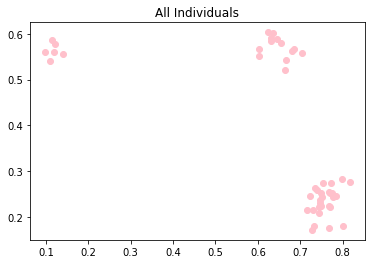

In [51]:
for individual in sts.individuals():
    x = individual.location[0]
    y = individual.location[1]
    plt.scatter(x,y, color = 'pink')
    
plt.title("All Individuals")
plt.show()

In [21]:
for edge in sts.edges():
    print(edge)
    
## Look at the Edge Table for clarity.

Edge(left=0.0, right=10000.0, parent=40, child=1, metadata=b'', id=0)
Edge(left=0.0, right=10000.0, parent=40, child=5, metadata=b'', id=1)
Edge(left=0.0, right=10000.0, parent=40, child=22, metadata=b'', id=2)
Edge(left=0.0, right=10000.0, parent=41, child=21, metadata=b'', id=3)
Edge(left=0.0, right=10000.0, parent=41, child=30, metadata=b'', id=4)
Edge(left=0.0, right=10000.0, parent=42, child=6, metadata=b'', id=5)
Edge(left=0.0, right=10000.0, parent=42, child=38, metadata=b'', id=6)
Edge(left=0.0, right=10000.0, parent=43, child=13, metadata=b'', id=7)
Edge(left=0.0, right=10000.0, parent=43, child=33, metadata=b'', id=8)
Edge(left=0.0, right=10000.0, parent=44, child=14, metadata=b'', id=9)
Edge(left=0.0, right=10000.0, parent=44, child=29, metadata=b'', id=10)
Edge(left=0.0, right=10000.0, parent=45, child=4, metadata=b'', id=11)
Edge(left=0.0, right=10000.0, parent=45, child=37, metadata=b'', id=12)
Edge(left=0.0, right=10000.0, parent=46, child=7, metadata=b'', id=13)
Edge(le

Parent is node 67, child is node 64.

## 
## Making lists of parents and children

In [22]:
parents = []
children = []

for edge in sts.edges():
    parents.append(edge.parent)
    children.append(edge.child)

print (parents)

print (children)

[40, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 50, 50, 51, 51, 52, 52, 53, 53, 54, 54, 55, 55, 56, 56, 57, 57, 57, 58, 58, 58, 59, 59, 60, 60, 61, 61, 62, 62, 62, 63, 63, 64, 64, 65, 65, 66, 66, 67, 67]
[1, 5, 22, 21, 30, 6, 38, 13, 33, 14, 29, 4, 37, 7, 26, 25, 32, 11, 36, 16, 28, 12, 15, 17, 43, 9, 34, 10, 46, 0, 20, 2, 41, 24, 27, 3, 19, 47, 39, 45, 53, 44, 49, 23, 52, 35, 59, 18, 48, 56, 54, 58, 31, 51, 55, 63, 57, 62, 60, 64]


In [24]:
print (len(parents))

print (len(children))

60
60


Now to find which individuals these nodes belong to...

In [44]:
## take each parent node and run it through the nodes list to find the individual to which it belongs
p_ind = []

for i in parents:
    for node in sts.nodes():
        if i == node.id:
            p_ind.append(node.individual)
            
print (p_ind)

[37, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 32, 32, 32, 32, 33, 33, 33, 33, 34, 34, 35, 35, 36, 36, 28, 28, 29, 29, 29, 30, 30, 30, 31, 31, 25, 25, 26, 26, 27, 27, 27, 23, 23, 24, 24, 20, 20, 21, 21, 22, 22]


In [45]:
ch_ind = []

for i in children:
    for node in sts.nodes():
        if i == node.id:
            ch_ind.append(node.individual)
            
print(ch_ind)

[0, 2, 11, 10, 15, 3, 19, 6, 16, 7, 14, 2, 18, 3, 13, 12, 16, 5, 18, 8, 14, 6, 7, 8, 40, 4, 17, 5, 43, 0, 10, 1, 38, 12, 13, 1, 9, 44, 19, 42, 34, 41, 32, 11, 33, 17, 31, 9, 45, 28, 35, 30, 15, 33, 36, 23, 29, 27, 25, 24]


## 
## 3D Scatterplot

I'm still working on this!
I have to make the individuals connect correctly, which is going to to require list creation.

In [53]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')

x, y, z = [], [], []

for individual in sts.individuals():
    if individual.id in p_ind:
        x.append(individual.location[0])
        y.append(individual.location[1])
        z.append(individual.time)
        
ch_x, ch_y, ch_z = [], [], []
        
for individual in sts.individuals():
    if individual.id in ch_ind:
        ch_x.append(individual.location[0])
        ch_y.append(individual.location[1])
        ch_z.append(individual.time)

ax.scatter3D(x,y,z, color = 'r')
ax.plot(x,y,z, linewidth = 0.25, color = 'black') ### Gotta change this to connect each parent to its child 

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Generation')

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
## Alex's Code
##for i in range(len(lists)):
    ##ax.plot(lists[i][0], lists[i][1], zs=lists[i][2], color="black", linewidth=0.25)